In [2]:
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':(30,1)})

def visualise_sentiments(data):
  sns.heatmap(pd.DataFrame(data).set_index("Sentence").T,center=0, annot=True, cmap = "PiYG")

In [3]:
sentence = "the clear mountain sky, stood with the rapture of golden light. a ray of glory opened to thine eye, ripples the rooted landscape with the sight. when i saw you in the open, peeped out across the silver sunshine. the rainbows beam into thy eyes, the colours and the feeling so divine. glitter a yellow thing of sun, glitter a shadow on the wall. glitter a landscape full of tranquility, glitter a river with a waterfall. that they knew no greater splendor, inquisition to the angel's expression. how the landscape and beauty is seen so tender, that is the one and only question. eyes with the light of the imperial night, day in a grey excess of bright light. the light at night was only white, oh, what a sight."

In [4]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [5]:
sid.polarity_scores(sentence)

{'compound': 0.9814, 'neg': 0.03, 'neu': 0.735, 'pos': 0.235}

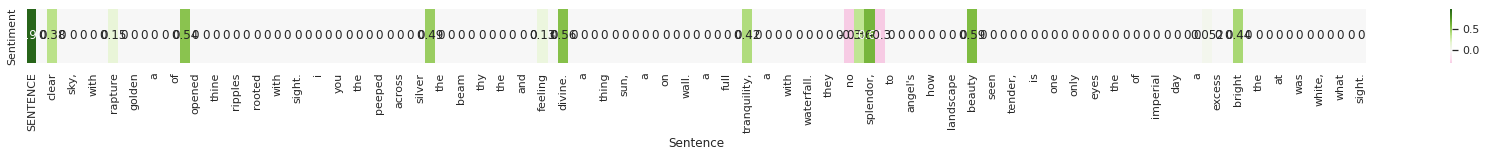

In [6]:
visualise_sentiments({
    "Sentence":["SENTENCE"] + sentence.split(),
    "Sentiment":[sid.polarity_scores(sentence)["compound"]] + [sid.polarity_scores(word)["compound"] for word in sentence.split()]
})

In [7]:
from textblob import TextBlob

In [8]:
TextBlob(sentence).sentiment

Sentiment(polarity=0.1833333333333333, subjectivity=0.5422222222222222)

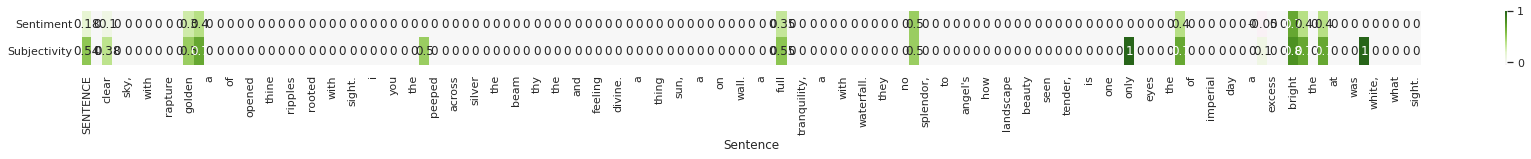

In [9]:
visualise_sentiments({
      "Sentence":["SENTENCE"] + sentence.split(),
      "Sentiment":[TextBlob(sentence).polarity] + [TextBlob(word).polarity for word in sentence.split()],
      "Subjectivity":[TextBlob(sentence).subjectivity] + [TextBlob(word).subjectivity for word in sentence.split()],
})

In [10]:
!pip3 install flair
import flair
flair_sentiment = flair.models.TextClassifier.load('en-sentiment')

     |████████████████████████████████| 322 kB 7.5 MB/s 
     |████████████████████████████████| 3.5 MB 61.4 MB/s 
     |████████████████████████████████| 67 kB 5.5 MB/s 
     |████████████████████████████████| 981 kB 70.2 MB/s 
     |████████████████████████████████| 19.7 MB 1.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 788 kB 46.8 MB/s 
     |████████████████████████████████| 48 kB 5.1 MB/s 
     |████████████████████████████████| 1.2 MB 47.5 MB/s 
     |████████████████████████████████| 64 kB 2.7 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 6.8 MB 45.8 MB/s 
     |████████████████████████████████| 596 kB 68.2 MB/s 
     |████████████████████████████████| 895 kB 60.2 MB/s 
  Created wheel for gdown: filename=gdown-3.12.2-py3-none-any.whl size=9692 sha256=16ce1757b40b16af16ce36dc5b18a80baa340a055d72e6

2022-02-01 04:22:43,069 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmpxfv61ak7


100%|██████████| 265512723/265512723 [00:16<00:00, 16173032.81B/s]

2022-02-01 04:22:59,990 copying /tmp/tmpxfv61ak7 to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2022-02-01 04:23:00,807 removing temp file /tmp/tmpxfv61ak7
2022-02-01 04:23:00,842 loading file /root/.flair/models/sentiment-en-mix-distillbert_4.pt


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [11]:
s = flair.data.Sentence(sentence)
flair_sentiment.predict(s)
total_sentiment = s.labels
total_sentiment

[POSITIVE (0.9999)]

## Tokenization

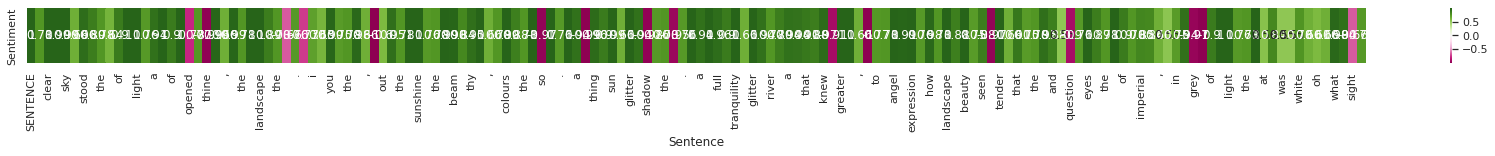

In [12]:
tokens = [token.text for token in s.tokens]
ss = [flair.data.Sentence(s) for s in tokens]
[flair_sentiment.predict(s) for s in ss]
sentiments = [s.labels[0].score * (-1,1)[str(s.labels[0]).split()[0].startswith("POS")] for s in ss]

visualise_sentiments({
      "Sentence":["SENTENCE"] + tokens,
      "Sentiment":[total_sentiment[0].score *(-1,1)[str(total_sentiment[0]).split()[0].startswith("POS")]] + sentiments,
})